In [2]:
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import glob

encode = [
    # 0 1 2 3 4
            'chevrolet_malibu_sedan_2012_2016',
            'chevrolet_malibu_sedan_2017_2019',

            'chevrolet_spark_hatchback_2016_2021',

            'chevrolet_trailblazer_suv_2021_',

            'chevrolet_trax_suv_2017_2019',


####################################################################################
    # 5 6 7 

            'genesis_g80_sedan_2016_2020',
            'genesis_g80_sedan_2021_',

            'genesis_gv80_suv_2020_',


####################################################################################
    # 8 9 10 11 12 13 14 15
            'hyundai_avante_sedan_2011_2015',
            'hyundai_avante_sedan_2020_',

            'hyundai_grandeur_sedan_2011_2016',

            'hyundai_grandstarex_van_2018_2020',

            'hyundai_ioniq_hatchback_2016_2019',

            'hyundai_sonata_sedan_2004_2009',
            'hyundai_sonata_sedan_2010_2014',
            'hyundai_sonata_sedan_2019_2020',


####################################################################################
    # 16 17 18 19 20 21 22 23 24 25 26 27 28 29

            'kia_carnival_van_2015_2020',
            'kia_carnival_van_2021_',

            'kia_k5_sedan_2010_2015',
            'kia_k5_sedan_2020_',
            'kia_k7_sedan_2016_2020',

            'kia_mohave_suv_2020_',

            'kia_morning_hatchback_2004_2010',
            'kia_morning_hatchback_2011_2016',

            'kia_ray_hatchback_2012_2017',

            'kia_sorrento_suv_2015_2019',
            'kia_sorrento_suv_2020_',
            
            'kia_soul_suv_2014_2018',
            
            'kia_sportage_suv_2016_2020',
            
            'kia_stonic_suv_2017_2019',


####################################################################################
    # 30 31

            'renault_sm3_sedan_2015_2018',

            'renault_xm3_suv_2020_',


####################################################################################
    # 32 33

            'ssangyong_korando_suv_2019_2020',

            'ssangyong_tivoli_suv_2016_2020'
            ]

In [3]:
base_dir = glob.glob('./open/train_crop/*.png')
base_dir.sort()
base_dir[0]

'./open/train_crop/syn_00000_0_9_1037_209_275_239.png'

In [4]:
cls_dict = defaultdict(list)

cnt = 0
for i, image_dir in enumerate(base_dir):
    cls = int(image_dir.split('/')[-1].split('_')[3])
    cls_dict[cls].append(image_dir)
    
    # cv2로 이미지 자르기
    # img = cv2.imread(image_dir)
    # img = img[150:, 75:]
    # plt.imshow(img)

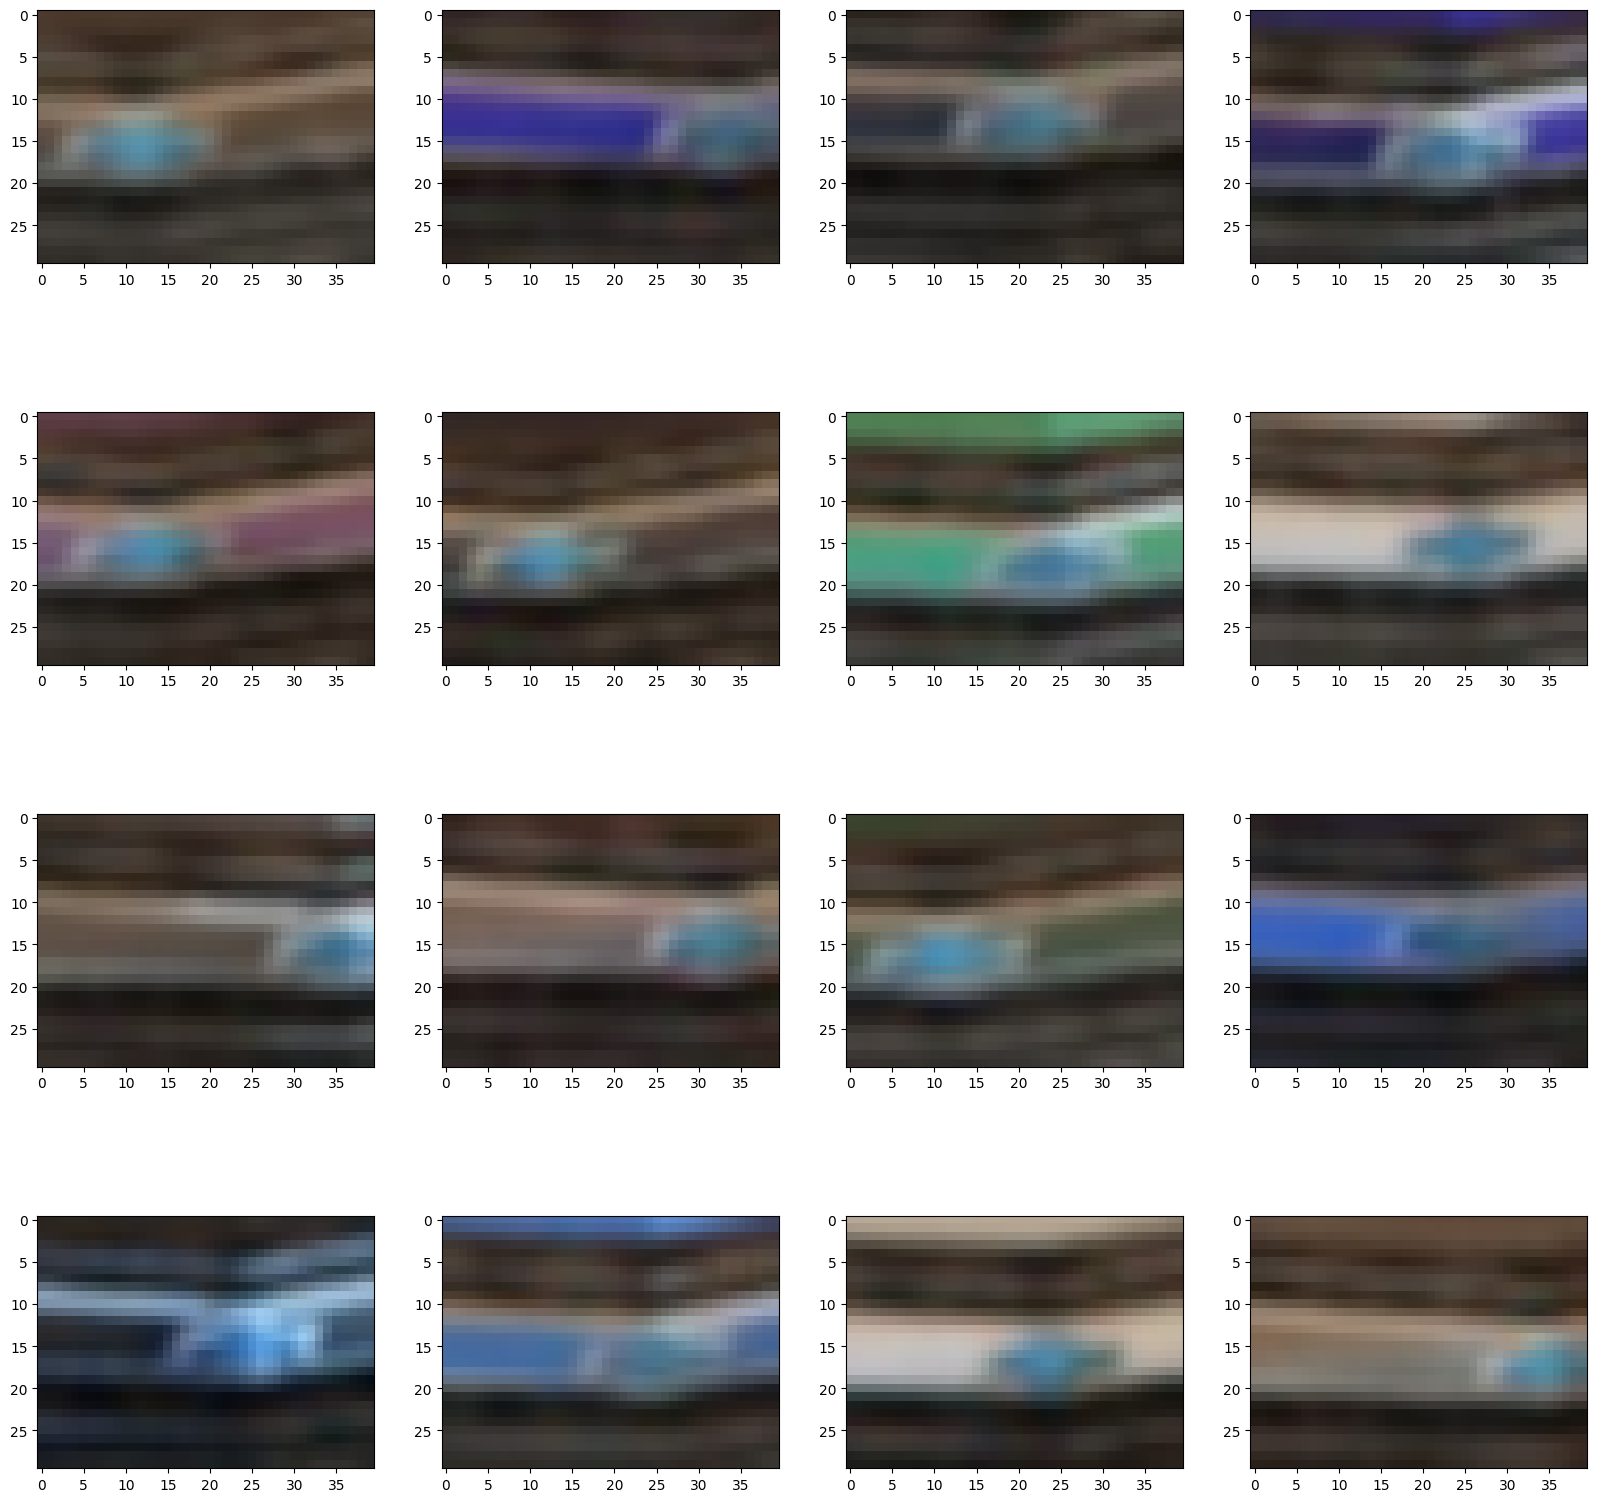

In [5]:
# 

def get_light(image):
    image = cv2.resize(image, (256, 256))
    image = image[150:, 40:]
    return image

def put_light(image, light):
    image = cv2.resize(image, (256, 256))
    image[150:, 40:] = light
    return image

def get_hood(image):
    image = cv2.resize(image, (256, 256))
    image = image[150:, 110:220]
    return image

def put_hood(image, hood):
    image = cv2.resize(image, (256, 256))
    image[150:, 110:220] = hood
    return image

def get_logo(image):
    image = cv2.resize(image, (256, 256))
    image = image[195:225, 140:180]
    image = cv2.blur(image, (3, 3))
    return image

def put_logo(image, logo):
    image = cv2.resize(image, (256, 256))
    image[195:225, 140:180] = logo
    return image


k = 1
num = 16

fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for i in range(num):
    image_dir = cls_dict[k][i]
    image = cv2.imread(image_dir)
    image = cv2.resize(image, (256, 256))
    image = get_logo(image)
    axes[i//4, i%4].imshow(image)

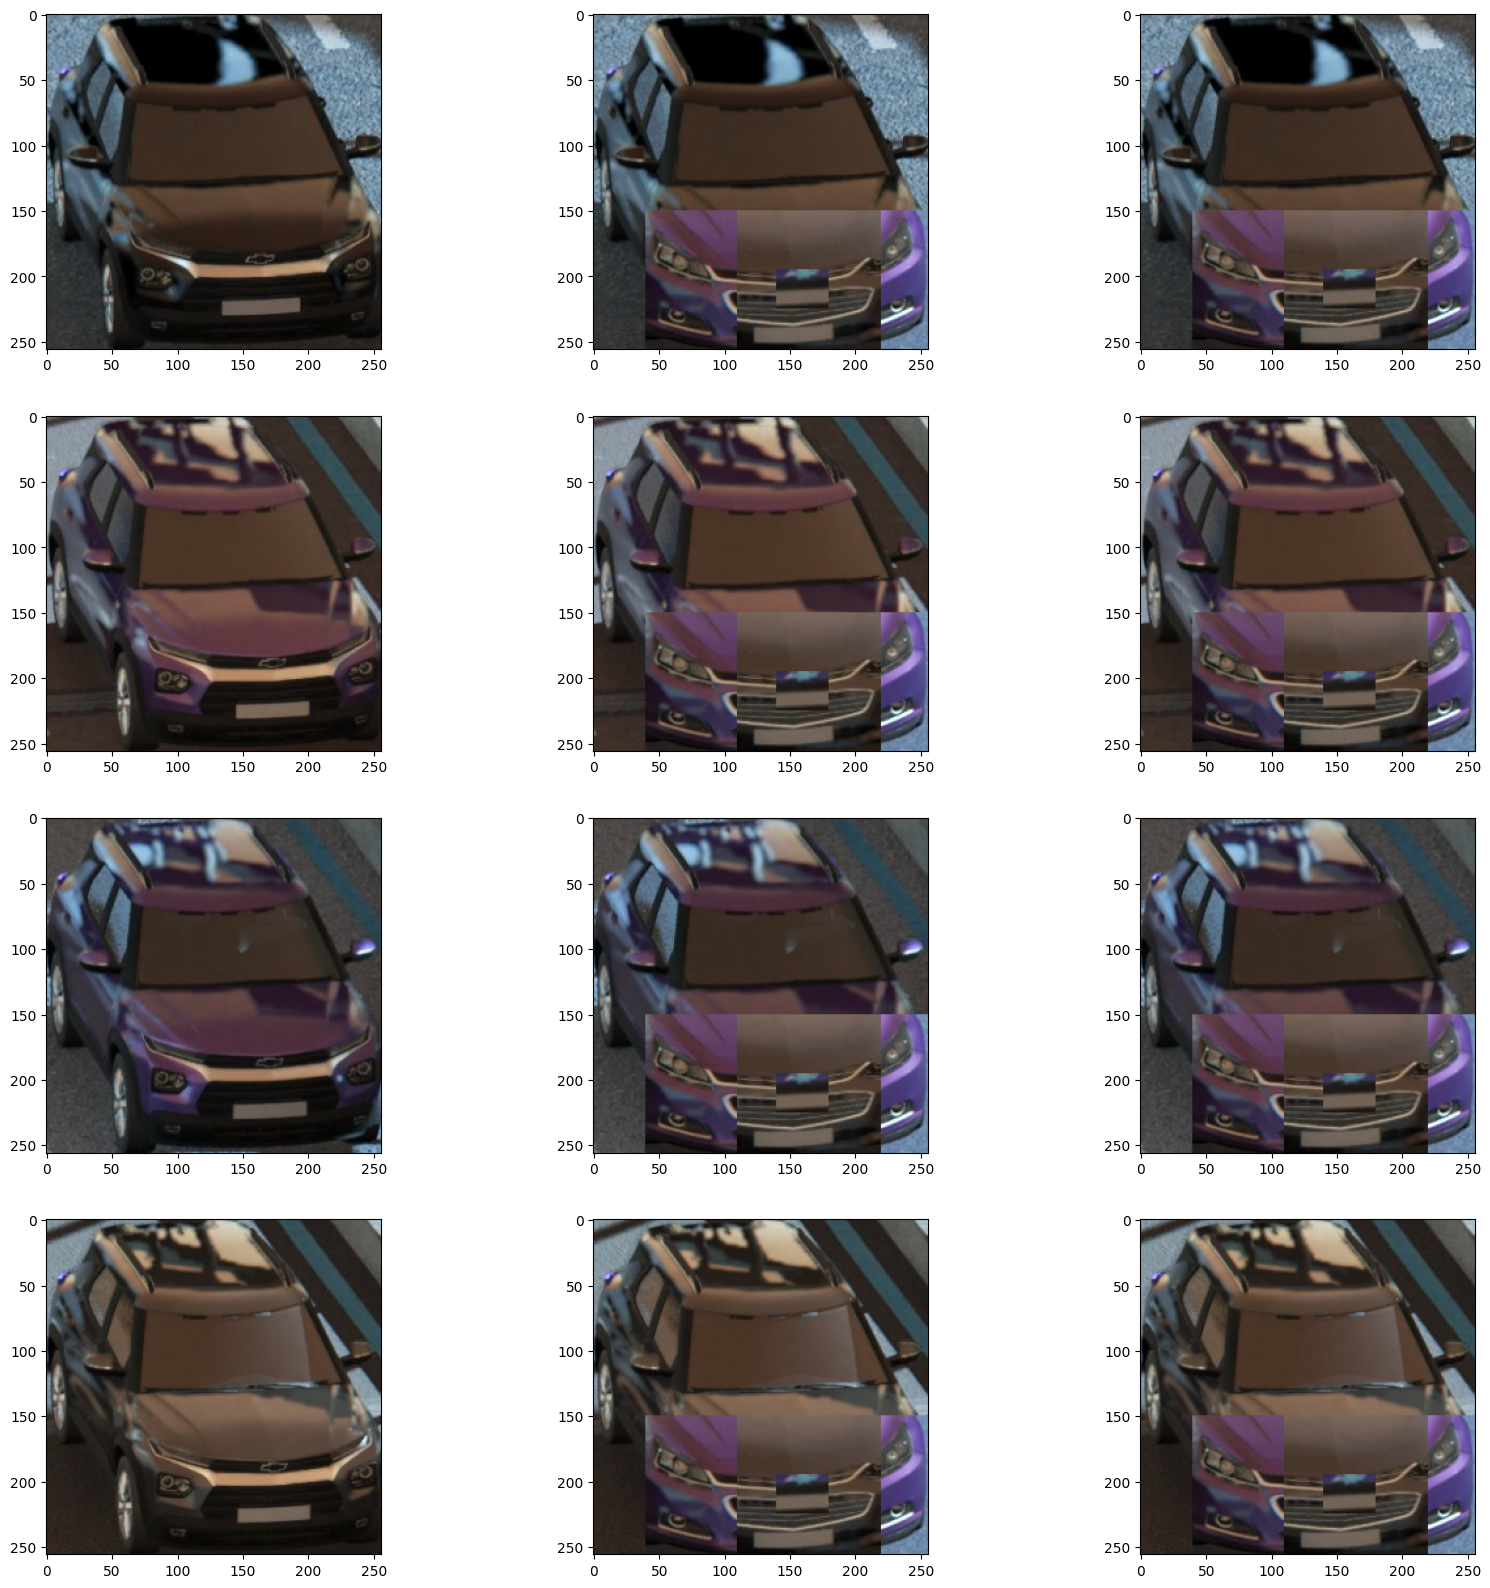

In [6]:
# 믹스 테스트

demo_dir = cls_dict[0][0]
demo_image = cv2.imread(demo_dir)
demo_image = cv2.resize(demo_image, (256, 256))
light = get_light(demo_image)

demo_dir = cls_dict[1][0]
demo_image = cv2.imread(demo_dir)
demo_image = cv2.resize(demo_image, (256, 256))
hood = get_hood(demo_image)

demo_dir = cls_dict[2][0]
demo_image = cv2.imread(demo_dir)
demo_image = cv2.resize(demo_image, (256, 256))
logo = get_logo(demo_image)



k = 3
num = 4
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
for i in range(num):
    image_dir = cls_dict[k][i]
    image = cv2.imread(image_dir)
    image = cv2.resize(image, (256, 256))
    new_image = put_light(image, light)
    new_image = put_hood(new_image, hood)
    new_image = put_logo(new_image, logo)
    
    axes[i, 0].imshow(image)
    axes[i, 1].imshow(new_image)
    axes[i, 2].imshow(new_image)

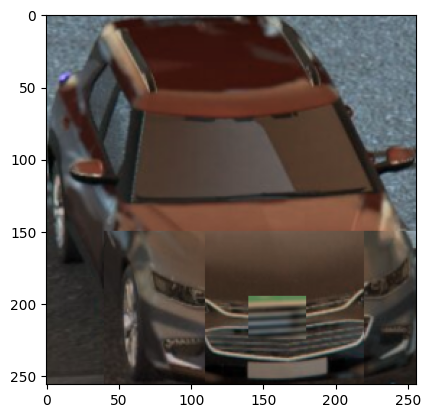

In [7]:
group_dict = {
    'chevrolet': [0, 1, 2, 3, 4],
    'genesis': [5, 6, 7],
    'hyundai': [8, 9, 10, 11, 12, 13, 14, 15],
    'kia': [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
    'renault': [30, 31],
    'ssangyong': [32, 33],
}

# 0~6 중 랜덤하게 4개 뽑아 믹스
def get_mix():
    frame_cls, light_cls, hood_cls, logo_cls = np.random.choice(len(group_dict.keys()), 4, replace=True)
    frame_idx = np.random.choice(cls_dict[frame_cls], 1, replace=True)
    light_idx = np.random.choice(cls_dict[light_cls], 1, replace=True)
    hood_idx = np.random.choice(cls_dict[hood_cls], 1, replace=True)
    logo_idx = np.random.choice(cls_dict[logo_cls], 1, replace=True)

    frame = cv2.imread(frame_idx[0])
    light = cv2.imread(light_idx[0])
    hood = cv2.imread(hood_idx[0])
    logo = cv2.imread(logo_idx[0])

    frame = cv2.resize(frame, (256, 256))
    light = cv2.resize(light, (256, 256))
    hood = cv2.resize(hood, (256, 256))
    logo = cv2.resize(logo, (256, 256))

    light = get_light(light)
    hood = get_hood(hood)
    logo = get_logo(logo)

    new_image = put_light(frame, light)
    new_image = put_hood(new_image, hood)
    new_image = put_logo(new_image, logo)

    return new_image, frame_cls, light_cls, hood_cls, logo_cls



new_image, frame_cls, light_cls, hood_cls, logo_cls = get_mix()
plt.imshow(new_image)


In [8]:
# 합성 이미지 저장할 폴더 생성
save_dir = f'./open/backgrounds'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    

In [9]:
from tqdm import tqdm

for i in tqdm(range(500),total=500):
    new_image, frame_cls, light_cls, hood_cls, logo_cls = get_mix()
    cv2.imwrite(os.path.join(save_dir, f'{i}_{frame_cls}_{light_cls}_{hood_cls}_{logo_cls}.png'), new_image)

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [00:06<00:00, 74.68it/s]


In [10]:
image_dirs = glob.glob('./open/backgrounds/*.png')
train_dirs = image_dirs[:400]
valid_dirs = image_dirs[400:]

train_df = {
    'crop_name': [dir.split('/')[-1] for dir in train_dirs],
    'class_id': [34 for _ in range(len(train_dirs))],
    }
train_df = pd.DataFrame(train_df)

valid_df = {
    'crop_name': [dir.split('/')[-1] for dir in valid_dirs],
    'class_id': [34 for _ in range(len(valid_dirs))],
    }
valid_df = pd.DataFrame(valid_df)

train_df.to_csv('./open/34_train.csv', index=False)
valid_df.to_csv('./open/34_valid.csv', index=False)